$$ {\Large  Laboratory ~~ work~~ № ~~ 6} $$
$$   $$
$$ \Huge \text{  Random search method} $$





                                                        The work of 
                                           Students of the Radiophysics  Faculty
                                                  430 gr. Miheytsev Nikita

## Theoretical intelligence and algorithm method

Space is represented as the n - dimensional sphere, where n - the dimension of the function.
Sets some starting point $ (x0_ {0}, x1_0, x2_0, ..., xn_0 $), which will begin calculation. Define value of the function at this point.Next,using a random number generator selected n random angles in the ranges:
$ \alpha_1 = [0,2\pi],  \alpha_2 = [0,\pi], ...,  \alpha_n = [0,\pi],$   
Running a step in this direction. Coordinates converted from the relations:
  
$$ x_1 = R\sin{\alpha_1}\sin{\alpha_2}\sin{\alpha_3}...\sin{\alpha_{n-1}}$$ 

$$ x_1 = R\cos{\alpha_1}\sin{\alpha_2}\sin{\alpha_3}...\sin{\alpha_{n-1}}$$  

$$ x_1 = R\cos{\alpha_2}\sin{\alpha_3}\sin{\alpha_4}...\sin{\alpha_{n-1}}$$  

$$ ... $$ 

$$ x_1 = R\cos{\alpha_{n-1}}$$  

Now calculate value of the function in the resulting point. If it has increased, it remains at the starting point, step decreases slightly (by 1-10%) and again played a random direction and checks the value of the function at the new point.

If the function value at the new point has decreased, the pitch increases slightly (by 1-10%) and a new point is a step in that direction, etc. until the last point is not found any direction leading to a reduction of the functional, with the step length will always decrease (1-10%) until it reaches the vicinity of e-step size set in advance.

It is important to correctly calculate a random direction in a multidimensional space. In the 2-dimensional case, the direction is given by the same angle (for example, with respect to the x-axis), which varies from 0 to 2p. Playing the random variable x on the interval (0,1), a random direction defined by the angle j = 2p × x. The result is a uniform distribution of directions (points on the circle).

In 3-dimensional space direction defined by two angles: azimuth and zenith angle j θ. For uniform distribution of points on a sphere (random directions in 3-dimensional space), it is necessary to play the 2 random variables x1 and x2. Azimuth is defined as well as a 2-dimensional case j = 2p × x1, and the inclination angle theta is defined as follows: θ = arccos (x2)

$ \large   { \underline{Standart \; random \; search \; method \; realization}} $

Random Search for function : -(x1^4 +  x2^4 +  x3^4 +  x4^4 +  x5^4 +  x6^4 +  x7^4 +  x8^4 +  x9^4 +  x10^4)
iterations  3778
direction changes  1379
[-0.0025922071643420998, 0.0024970344070272031, 0.0011431974987844418, -0.00068188041618820429, -0.00078932059501309298, -0.00095145140584338892, 0.00052561641971238509, 0.00040750530307704459, 0.00053791320128625567, -0.00056958640263231558]


Random Search for function : x1^2*x2 + x2^3 + 6*x1*x2 + 1
iterations  224
direction changes  20
[-3.0000471936368838, -1.7320551470728758]


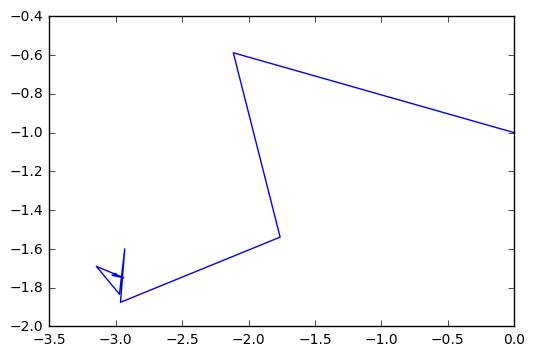

In [3]:
import matplotlib.pyplot as plt
def random_search(f,x,precision):
    import numpy as np 
    import numpy.random as rand 
    import math
    
    
    n = len(x)
    d = 0.5
    ed = d * precision
    dstep = 0.05 # 5 percent
    x1 = [x[0]]
    x2 = [x[1]]
    jjj = 0
    qqq = 0
    
    while(d > ed): 
        jjj += 1
        alpha = math.pi * np.ones(n-1)
        alpha[0] *= 2

        for i in range(0,n-1):  
            alpha[i] *= rand.random_sample()

        #print("alpha = ",alpha)     

        dx = np.ones(n)
        for i in range(0,n-1):
            for j in range(0,n):
                if j-1 <= i:
                    if j-1 == i:
                        dx[j] *= np.cos(alpha[i])
                    else:
                        dx[j] *= np.sin(alpha[i])

        
        step = np.zeros(n)
        for i in range(0,n):
            step[i] = x[i] + d * dx[i]
        
        
        if ( f(step) > f(x) ):
            qqq +=1
            while (True) :
                d += d * dstep
                for i in range(0,n): 
                    x[i] = step[i]
                    step[i] = x[i] + d * dx[i]
                if ( f(step) <= f(x)) :
                    break
                    
        else:
            d -= d *dstep
            x1.append(x[0])
            x2.append(x[1])
    print("iterations ",jjj)  
    print("direction changes ",qqq)
    return (x,x1,x2)   
                    
           
def f(x):
    return x[0]*x[0]*x[1] + x[1]**3 + 6*x[0]*x[1] + 1
#x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 +  x[4]**2 + x[5]**2 + x[6]**2+x[7]**2 + x[8]**2+x[9]**2 

def f1(x): 
    return -(x[0]**4 + x[1]**4 + x[2]**4 + x[3]**4 +  x[4]**4 + x[5]**4 + x[6]**4 + x[7]**4 + x[8]**4 +x[9]**4)


print ("Random Search for function : -(x1^4 +  x2^4 +  x3^4 +  x4^4 +  x5^4 +  x6^4 +  x7^4 +  x8^4 +  x9^4 +  x10^4)")  
print(random_search(f1,[4,53,4,52,443,5,24,4,5,52],0.001)[0])

print ("")
print ("")

print ("Random Search for function : x1^2*x2 + x2^3 + 6*x1*x2 + 1")
xx,xx1,xx2 = random_search(f,[0,-1],0.0001)
print(xx)
plt.plot(xx1,xx2)
plt.show()

$$ \Large\text{   AN  OPTIMIZED  STEP  SIZE  RANDOM  SEARCH  (OSSRS) } $$ 


$$ \Large 	\text{   Details   of  the  method  } $$ 

Given a starting point $x_0$, evaluate the function at this point. Generate a random vector which
 passes through  $x_0$  and  whose  coordinates  are drawn  from  a  normal  distribution of zero mean and
a given standard  
deviation using numpy.random module. Normalize  this  vector  and call  it  d.


The expression $x_i=x_0+x_id$ describes a point on the line passing through $x_0$, in the direction d. In particular, the points $x_1 = x_0-d , x_2 = x_0,  x_3 = x_0+d$ correspond to the values $\lambda_1 = -1,  \lambda_2 = 0,  \lambda_3 = +l.$   

Let $f_i = f(x_i)$. Then a, b, c may be determined so that the quadratic 
$F'(\lambda)   f(x_0+\lambda d) = a\lambda^2   +b x+c $ 

passes through the three points $(f_1 , - 1 ), (f_2, 0) $ and $ (f_3, 1) $ in the $(f, \lambda)$ plane. The minimum of $ F(\lambda) $ on this curve exists if $F''(\lambda)$ is positive.   If   $F''(\lambda)$ is positive, then $ x'$ corresponding to the minimum of F is got by equating its first derivative to zero, i.e..   
$ { F'(\lambda)|_{\lambda = \lambda^*} h=hf = 2ah’ + b = 0 . }$ 


The coefficients a and b can be determined by solving the three linear equations 
$$ {f_1=  a(-1)^2+b(-l)+c}$ $

$$ {f_2 =a(0)^2+b(0)+c }$$ 

$$ {f_3 = a(1)^2 + b(1) + c  (4) }$$  
which give 
$$ {a =\frac{1}{2}(f_1-2f_1+f_3) }$$ 
$$ {b=\frac{(f_3-f_1)}{2}}$$ 
Substitution of (5) in (3) gives $ \lambda^*$ Now the function is evaluated at
$$ x'=x_0 + \lambda^* d.$$
If $f(x')<f(x_0)$, then x_0, is replaced by $x'$ and $f(x_0)$ by $f(x')$, and the search is continued from this point.   Otherwise a new random direction passing through $x_0$, is generated, and the process is continued. 


If$F''(\lambda)$ is negative, x_0, is replaced by the point yielding the least function value among $x_i,i=1,2,3,\cdots$ and then a new random direction is generated which passes through this point. This process is continued till the relative error   falls below a prescribed positive number $\epsilon $ 

$ \Large \text{  Optimized step size random search (OSSRS) realization} $

In [4]:
import numpy as np 
import numpy.random as rand 
import math
    
def optimized_random_search(f,x,precision):
    import numpy as np 
    import numpy.random as rand 
    import math
    
    n = len(x)
    d = 1
    ed = precision
    flist = [0,0,0]
    jjj = 0
    d_n = 0.00000001
    
    while(abs(d_n - d)/abs(d_n) > ed): 
        jjj += 1 
        
        alpha = math.pi * np.ones(n-1)     # Задаём альфа(углы) массивом из Пи
        alpha[0] *= 2

        for i in range(0,n-1):  
            alpha[i] *= rand.random_sample()  #  Умножаем на рандомную величину в [0,1]
        #  Получаем углы альфа в нужных диапазонах

        #print("alpha = ",alpha)     

        dx = np.ones(n)
        for i in range(0,n-1):
            for j in range(0,n):                            #  Подсчитываем dx - направление
                if j-1 <= i:                              
                    if j-1 == i:                        
                        dx[j] *= np.cos(alpha[i])      
                    else:
                        dx[j] *= np.sin(alpha[i])

        step_f = np.zeros(n)      #  Массивы для шагов вперёд, назад
        step_b = np.zeros(n)    
        
        for i in range(0,n):              #   Шагаем вперёд и назад
            step_f[i] = x[i] + dx[i]
            step_b[i] = x[i] - dx[i]
   
        flist[0] = f(step_b)     #   Список значений функции (-лямбда , 0 , + лямбда )
        flist[1] = f(x)
        flist[2] = f(step_f)
      
        a = 1/2 * (flist[0] - 2*flist[1] + flist[2])    #  Считаем коэффициент а
        
        if ( a < 0 ): 
            b = (flist[2] - flist[0]) /2   #  Считаем коэффициент b
            d = d_n                        
            d_n = -  b / ( 2*a )     #  Предыдущее ,следущее d
        
            
            for i in range(0,n): 
                step_f[i] = x[i] +  d_n * dx[i]   # Пересчитываем шаг вперёд
            if(f(step_f) > f(x) ):
                for i in range(0,n):            
                    x[i] = step_f[i]   # Делаем шаг в направлении "вперёд"
            
                    
        else:                                    # Если a > 0
            if (flist[0] == max(flist)):         
                x = step_b                       # X переносится в точку,где функция наибольшая 
            elif (flist[2] == max(flist)):
                x = step_f
    print(jjj)   
    return(x)  
        
    
           
def f(x): 
    return x[0]*x[0]*x[1] + x[1]**3 + 6*x[0]*x[1] + 1
#x[0]**4 + x[1]**4 + x[2]**4 + x[3]**4 +  x[4]**4 + x[5]**4 + x[6]**4 + x[7]**4 + x[8]**4 +x[9]**4 
def f1(x): 
    return -((x[0]-4)**4 + x[1]**4 + x[2]**4 + x[3]**4 +  x[4]**4 + x[5]**4 + x[6]**4 + x[7]**4 + x[8]**4 +x[9]**4)

def f2(x): 
    return np.exp(-x[0]**2-x[1]**4)

print ("Optimized Step Size Random Search for function : x1^2*x2 + x2^3 + 6*x1*x2 + 1")
print("Min is ",optimized_random_search(f,[0,-1],0.01))
print ("")

print ("Random Search for function : -((x1 - 4)^4 +  x2^4 +  x3^4 +  x4^4 +  x5^4 +  x6^4 +  x7^4 +  x8^4 +  x9^4 +  x10^4)") 
print("Min is ",optimized_random_search(f1,[4,53,4,52,443,5,24,4,5,52],0.0001))
print ("")

print ("Random Search for function : e^(-x1^2 - x2^4)")  
print("Min is ",optimized_random_search(f2,[4,4],0.001))

Optimized Step Size Random Search for function : x1^2*x2 + x2^3 + 6*x1*x2 + 1
26
Min is  [-2.98715368 -1.65067709]

Random Search for function : -((x1 - 4)^4 +  x2^4 +  x3^4 +  x4^4 +  x5^4 +  x6^4 +  x7^4 +  x8^4 +  x9^4 +  x10^4)
10638
Min is  [3.9999999999997087, 3.160882093821781e-13, -2.1953171555720139e-13, -7.3305388432871382e-14, 3.1349759942572427e-14, 1.769770575712084e-14, 1.0444353671858354e-13, -8.0047096947394396e-14, -9.1306259623190781e-15, -9.0947722757652558e-14]

Random Search for function : e^(-x1^2 - x2^4)
34
Min is  [ 0.00013574 -0.01590002]


$ {\large Lines \; of \;levels }$

332
For function x1^2*x2 + x2^3 + 6*x1*x2 + 1


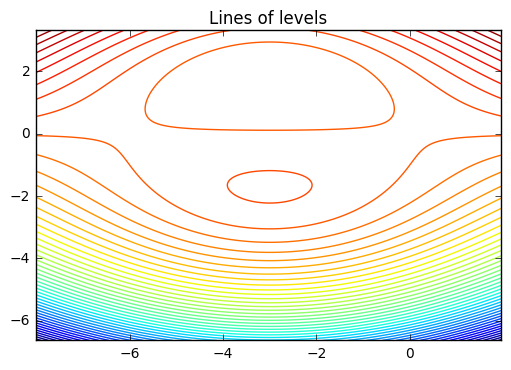

In [5]:
import pylab
import numpy as np

def f(x): 
    return x[0]*x[0]*x[1] + x[1]**3 + 6*x[0]*x[1] + 1
xx = optimized_random_search(f,[0,-1],0.001)
#print(xx)

def makeData():
    x = np.arange(xx[0]-5, xx[0]+5, 0.05)
    y = np.arange(xx[1]-5, xx[1]+5, 0.05)
    xgrid, ygrid = np.meshgrid(x, y)

    zgrid = f([xgrid,ygrid])
    return xgrid, ygrid, zgrid


if __name__ == '__main__':
    x, y, z = makeData()
    
    pylab.title("Lines of levels")
    pylab.contour(x, y, z,50)
    print("For function x1^2*x2 + x2^3 + 6*x1*x2 + 1")
    pylab.show()

$ {\large Graphic \; of \;function }$

Plot of function x1^2*x2 + x2^3 + 6*x1*x2 + 1


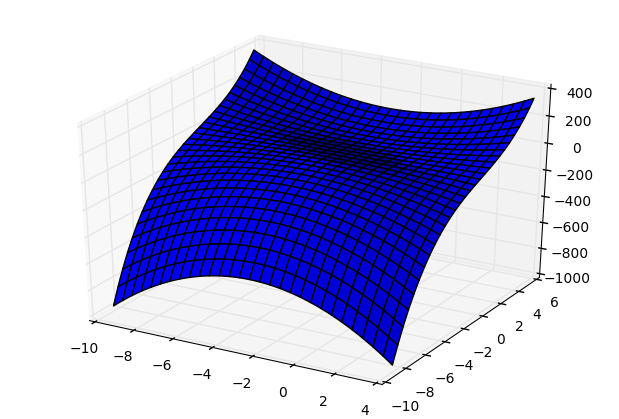

In [6]:
import pylab 
from mpl_toolkits.mplot3d import Axes3D 
import numpy 


def makeData(): 
    x = np.arange(xx[0]-7, xx[0]+7, 0.05)
    y = np.arange(xx[1]-7, xx[1]+7, 0.05) 
    xgrid, ygrid = numpy.meshgrid(x, y) 

    zgrid = f([xgrid,ygrid]) 
    return xgrid, ygrid, zgrid 


if __name__ == '__main__': 
    x, y, z = makeData() 

    fig = pylab.figure() 
    axes = Axes3D(fig) 

    axes.plot_surface(x, y, z) 
    print("Plot of function x1^2*x2 + x2^3 + 6*x1*x2 + 1")
    pylab.show()

### Compare 
According to results of the calling the two methods, it becomes apparent that the optimized random search is the more rapidly converging method then standart random search (average 5-6 times faster for funtions of lower orders and near of 2 times faster for functions of 10-th order)